### Data Acquisition and Simple Exploring

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#from surprise import Reader, Dataset, SVD, CollaborativeFiltering

In [2]:
credits=pd.read_csv('tmdb_5000_credits.csv')
movies=pd.read_csv('tmdb_5000_movies.csv')

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
# make the same name for id to be able to be merged
credits.rename(columns={"movie_id":"id"}, inplace=True)

In [6]:
df= movies.merge(credits,on='id')

In [7]:
df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
df.shape

(4803, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [10]:
df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

### Null handling and simple Feature Engineering

In [11]:
#drop the homepage column because of too much null values and lack of importance
df.drop(columns='homepage', inplace=True)

In [12]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


<AxesSubplot:>

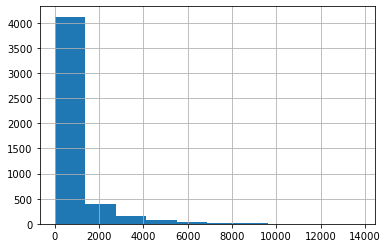

In [13]:
# exploring vote_count to manage the outlires
df.vote_count.hist()

In [14]:
def replace_quantile(val,thresh):
    if val < thresh:
        return thresh
    else:
        return val

In [15]:
#lower bound 
lower_b_voters = df.vote_count.quantile(q=0.1)
lower_b_voters

12.0

In [16]:
df["vote_count"] = df.vote_count.apply(lambda x: replace_quantile(x, lower_b_voters))

In [17]:
df.vote_count.value_counts()

12.0      503
19.0       26
15.0       26
13.0       25
16.0       24
         ... 
4997.0      1
1373.0      1
4048.0      1
648.0       1
2078.0      1
Name: vote_count, Length: 1597, dtype: int64

#### first try to have a simple recommender as a base

In [18]:
df["score"] = df["vote_average"]*df["vote_count"]

In [19]:
df

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",84960.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",31050.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",28135.8
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",69205.6
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",12956.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",...,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238.0,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",1570.8
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 1074

In [20]:
df[["original_title",'vote_average',"score"]].sort_values(by="score",ascending= False).head(10)

,original_title,vote_average,score
96,Inception,8.1,111391.2
65,The Dark Knight,8.2,98416.4
95,Interstellar,8.1,88022.7
16,The Avengers,7.4,87142.4
0,Avatar,7.2,84960.0
788,Deadpool,7.4,81363.0
287,Django Unchained,7.8,78772.2
662,Fight Club,8.3,78127.9
94,Guardians of the Galaxy,7.9,76961.8
634,The Matrix,7.9,70365.3


In [21]:
#use IMDB formula for defining a score which handles the outlier problem
C= df['vote_average'].mean()
m= df["vote_count"].quantile(0.9)

df["score"] = (df["vote_count"]/(df["vote_count"]+m)) * df["vote_average"] + (m/(m+df["vote_count"])) * C

In [22]:
top_ten_scores = df[["original_title",'vote_average',"score"]].sort_values(by="score",ascending= False).head(10)
top_ten_scores

,original_title,vote_average,score
1881,The Shawshank Redemption,8.5,8.059258
662,Fight Club,8.3,7.939256
65,The Dark Knight,8.2,7.920020
3232,Pulp Fiction,8.3,7.904645
96,Inception,8.1,7.863239
3337,The Godfather,8.4,7.851236
95,Interstellar,8.1,7.809479
809,Forrest Gump,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8.1,7.727243
1990,The Empire Strikes Back,8.2,7.697884


AS we can see, using the IMDB formula has led to a better result, with respect to the comparison between **vote_average** and **score**.

Text(0.5, 1.0, 'Top ten movies by score')

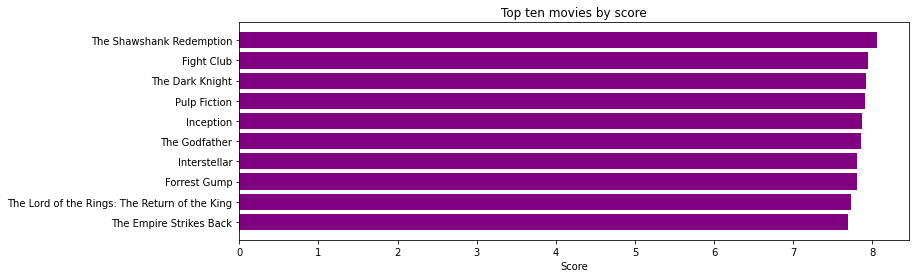

In [23]:
plt.figure(figsize=(12,4))

plt.barh(top_ten_scores['original_title'],top_ten_scores["score"], align='center',
        color='purple')
plt.gca().invert_yaxis()
plt.xlabel("Score")
plt.title("Top ten movies by score")

In [24]:
df[["original_title",'vote_average',"score","popularity"]].sort_values(by="popularity",ascending= False).head(10)

,original_title,vote_average,score,popularity
546,Minions,6.4,6.311706,875.581305
95,Interstellar,8.1,7.809479,724.247784
788,Deadpool,7.4,7.212652,514.569956
94,Guardians of the Galaxy,7.9,7.613005,481.098624
127,Mad Max: Fury Road,7.2,7.019214,434.278564
28,Jurassic World,6.5,6.428598,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,7.5,7.206672,271.972889
82,Dawn of the Planet of the Apes,7.3,6.944634,243.791743
200,The Hunger Games: Mockingjay - Part 1,6.6,6.474220,206.227151
88,Big Hero 6,7.8,7.406232,203.734590


Text(0.5, 1.0, 'Popular Movies')

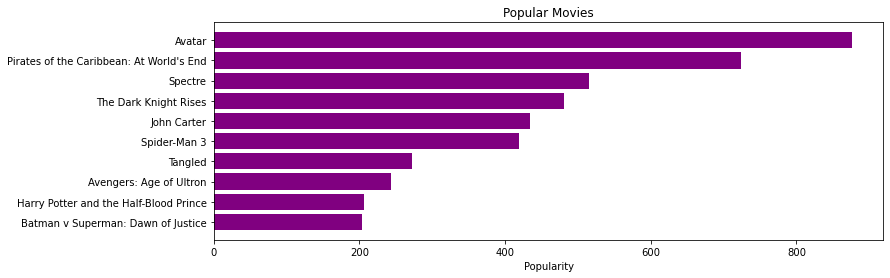

In [25]:
plt.figure(figsize=(12,4))

plt.barh(df['original_title'].head(10),df.sort_values('popularity', ascending=False)['popularity'].head(10), align='center',
        color='purple')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


In [26]:
#Remove all english stop words like articles (the, a, an, etc)
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string, because it is not reasonable eliminate some imporant data
# because of just lack of overview which can be handled by other metrics if it is needed
df['overview'] = df['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['overview'])

#Checking the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [27]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

### Exploring the structure of the values of some features like crew, cast and keywords

In [33]:
df.crew[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [34]:
df.cast[0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [35]:
df.keywords[0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [36]:
df.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [37]:
json.loads(df.genres[0])

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

### Preprocessing the aforementioned features to make them suitable for Analysis and Modeling

In [38]:
features = ['cast', 'crew', 'keywords', 'genres', 'production_companies', 'production_countries', 'spoken_languages']
for feature in features:
    df[feature] = df[feature].apply(json.loads)

In [39]:
df

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,score
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",7.050669
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",6.665696
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",...,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466.0,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",6.239396
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",7.346721
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",6.096368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",9367,"[{'id': 5616, 'name': 'united states–mexico ba...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{'name': 'Columbia Pictures', 'id': 5}]","[{'iso_3166_1': 'MX', 'name': 'Mexico'}, {'iso...",...,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238.0,El Mariachi,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...",6.150380
4799,9000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],...,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,12.0,Newlyweds,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",6.090925
4800

In [40]:
# Define a function to extract the director name from the crew list
def get_director(crew_list):
    for item in crew_list:
        if item['job'].lower() == 'director':
            return item['name']
    return ""

In [41]:
get_director(df.crew[0])

'James Cameron'

In [42]:
# Define a function to extract the writer name from the crew list

def get_writer(crew_list):
    for item in crew_list:
        if item['job'].lower() == 'writer':
            return item['name']
    return ""

In [43]:
get_writer(df.crew[0])

'James Cameron'

In [44]:
# Define a function to extract the producer name from the crew list

def get_producer(crew_list):
    for item in crew_list:
        if item['job'].lower() == 'producer':
            return item['name']
    return ""

In [45]:
get_producer(df.crew[0])

'James Cameron'

In [46]:
# Define a function to extract the name of the cast or genres or keywords from their corresponding list

def get_name(list_of_dicts):
    result = []
    for item in list_of_dicts:
        result.append(item["name"])
    return result[:5]

In [47]:
genres_no = []
for i in range(len(df)):
    genres_no.append(len(get_name(df.genres[i])))

In [48]:
# the reason why I chose 5 as a threshold in the previous cells
max(genres_no)

5

In [49]:
df.cast[1]

[{'cast_id': 4,
  'character': 'Captain Jack Sparrow',
  'credit_id': '52fe4232c3a36847f800b50d',
  'gender': 2,
  'id': 85,
  'name': 'Johnny Depp',
  'order': 0},
 {'cast_id': 5,
  'character': 'Will Turner',
  'credit_id': '52fe4232c3a36847f800b511',
  'gender': 2,
  'id': 114,
  'name': 'Orlando Bloom',
  'order': 1},
 {'cast_id': 6,
  'character': 'Elizabeth Swann',
  'credit_id': '52fe4232c3a36847f800b515',
  'gender': 1,
  'id': 116,
  'name': 'Keira Knightley',
  'order': 2},
 {'cast_id': 12,
  'character': 'William "Bootstrap Bill" Turner',
  'credit_id': '52fe4232c3a36847f800b52d',
  'gender': 2,
  'id': 1640,
  'name': 'Stellan Skarsgård',
  'order': 3},
 {'cast_id': 10,
  'character': 'Captain Sao Feng',
  'credit_id': '52fe4232c3a36847f800b525',
  'gender': 2,
  'id': 1619,
  'name': 'Chow Yun-fat',
  'order': 4},
 {'cast_id': 9,
  'character': 'Captain Davy Jones',
  'credit_id': '52fe4232c3a36847f800b521',
  'gender': 2,
  'id': 2440,
  'name': 'Bill Nighy',
  'order': 5

In [50]:
get_name(df.cast[1])

['Johnny Depp',
 'Orlando Bloom',
 'Keira Knightley',
 'Stellan Skarsgård',
 'Chow Yun-fat']

In [51]:
df['director'] = df['crew'].apply(get_director)
df['writer'] = df['crew'].apply(get_writer)
df['producer'] = df['crew'].apply(get_producer)

In [52]:

features = ['cast', 'keywords', 'genres', 'production_companies', 'production_countries', 'spoken_languages'] # 
for feature in features:
    df[feature] = df[feature].apply(get_name)

In [53]:
df

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,title_x,vote_average,vote_count,title_y,cast,crew,score,director,writer,producer
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,Avatar,7.2,11800.0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{'credit_id': '52fe48009251416c750aca23', 'de...",7.050669,James Cameron,James Cameron,James Cameron
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,Pirates of the Caribbean: At World's End,6.9,4500.0,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",6.665696,Gore Verbinski,,Jerry Bruckheimer
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi6]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,Spectre,6.3,4466.0,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",6.239396,Sam Mendes,,Barbara Broccoli
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,The Dark Knight Rises,7.6,9106.0,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",7.346721,Christopher Nolan,,Charles Roven
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,John Carter,6.1,2124.0,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",6.096368,Andrew Stanton,,Colin Wilson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[Action, Crime, Thriller]",9367,"[united states–mexico barrier, legs, arms, pap...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,[Columbia Pictures],"[Mexico, United States of America]",...,El Mariachi,6.6,238.0,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...",6.150380,Robert Rodriguez,,Robert Rodriguez
4799,9000,"[Comedy, Romance]",72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],...,Newlyweds,5.9,12.0,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Dietlein, C...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",6.090925,Edward Burns,Edward Burns,Edward Burns
4800,0,"[Comedy, Drama, Romance, TV Movie]",231617,"[date, love at first sight, narration, investi...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[Front Street Pictures, Muse Entertainment Ent...",[United States of America],...,"Signed, Sealed, Delivered",7.0,12.0,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...",6.098059,Scott Smith,Martha Williamson,Harvey Kahn
4801,0,[],126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[United States of America, China]",...,Shanghai Calling,5.7,12.0,Sh

In [54]:
df.isna().sum()

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  0
popularity                0
production_companies      0
production_countries      0
release_date              1
revenue                   0
runtime                   2
spoken_languages          0
status                    0
tagline                 844
title_x                   0
vote_average              0
vote_count                0
title_y                   0
cast                      0
crew                      0
score                     0
director                  0
writer                    0
producer                  0
dtype: int64

In [55]:
# Add new feature based on the above preprocessing to be used in the recommender system
def create_metadata(x):
    result = ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' '+ x['producer'] + ' ' + x['writer'] + ' '+' '.join(x['genres'])+' '+ x['overview']
    return result

In [56]:
df['metadata'] = df.apply(func=create_metadata, axis=1)

In [57]:
df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,vote_average,vote_count,title_y,cast,crew,score,director,writer,producer,metadata
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,7.2,11800.0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{'credit_id': '52fe48009251416c750aca23', 'de...",7.050669,James Cameron,James Cameron,James Cameron,culture clash future space war space colony so...
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,6.9,4500.0,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",6.665696,Gore Verbinski,,Jerry Bruckheimer,ocean drug abuse exotic island east india trad...
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi6]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,6.3,4466.0,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",6.239396,Sam Mendes,,Barbara Broccoli,spy based on novel secret agent sequel mi6 Dan...
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,7.6,9106.0,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",7.346721,Christopher Nolan,,Charles Roven,dc comics crime fighter terrorist secret ident...
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,6.1,2124.0,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",6.096368,Andrew Stanton,,Colin Wilson,based on novel mars medallion space travel pri...


In [58]:
temp = df.head(100)
temp['profitable'] = temp['revenue'] - temp['budget']
temp[['original_title','profitable']][temp.profitable<0]

C:\Users\Ali\AppData\Local\Temp\ipykernel_11932\236524052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['profitable'] = temp['revenue'] - temp['budget']


,original_title,profitable
13,The Lone Ranger,-165710090
73,Evan Almighty,-2000000
83,The Lovers,-27000000
84,47 Ronin,-24037525


In [59]:
df['profitable'] = df['revenue'] - df['budget']

In [60]:
df['profitable'] = df['profitable'].apply(lambda x: "Yes" if x>0 else "No")

In [61]:
df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,vote_count,title_y,cast,crew,score,director,writer,producer,metadata,profitable
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,11800.0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{'credit_id': '52fe48009251416c750aca23', 'de...",7.050669,James Cameron,James Cameron,James Cameron,culture clash future space war space colony so...,Yes
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,4500.0,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",6.665696,Gore Verbinski,,Jerry Bruckheimer,ocean drug abuse exotic island east india trad...,Yes
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi6]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,4466.0,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",6.239396,Sam Mendes,,Barbara Broccoli,spy based on novel secret agent sequel mi6 Dan...,Yes
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,9106.0,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",7.346721,Christopher Nolan,,Charles Roven,dc comics crime fighter terrorist secret ident...,Yes
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,2124.0,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",6.096368,Andrew Stanton,,Colin Wilson,based on novel mars medallion space travel pri...,Yes


In [62]:
df.profitable.value_counts()

Yes    2585
No     2218
Name: profitable, dtype: int64

It is observed that our data is rather balanced in terms of profitable feature.

### A Binary Classification Problem

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4803 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline              

In [64]:
df['tagline'].isna().sum()

844

In [65]:
df['tagline'].fillna("", inplace= True)

In [66]:
df['tagline'].isna().sum()

0

In [67]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [68]:
df.status.value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

Thus, it seems the status does not have a considerable impact on classification due to the lack of significant difference (almost all rows have the same value in terms of this feature)

In [69]:
df[['original_title', 'title_x', 'title_y']]

,original_title,title_x,title_y
0,Avatar,Avatar,Avatar
1,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End
2,Spectre,Spectre,Spectre
3,The Dark Knight Rises,The Dark Knight Rises,The Dark Knight Rises
4,John Carter,John Carter,John Carter
...,...,...,...
4798,El Mariachi,El Mariachi,El Mariachi
4799,Newlyweds,Newlyweds,Newlyweds
4800,"Signed, Sealed, Delivered","Signed, Sealed, Delivered","Signed, Sealed, Delivered"
4801,Shanghai Calling,Shanghai Calling,Shanghai Calling


In [70]:
data = df.drop(columns=['title_x', 'title_y', 'overview', 'id', 'metadata', 'crew', 'status', 'spoken_languages'])

In [71]:
list_type_cols = []
for col in data.iloc[0:5].columns:
    if isinstance(data[col].iloc[0],list):
        list_type_cols.append(col)

In [72]:
list_type_cols

['genres', 'keywords', 'production_companies', 'production_countries', 'cast']

In [73]:
data.drop(columns=list_type_cols[2:], inplace=True)

In [74]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

for col in list_type_cols:
    data = data.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(data.pop(col)),
                index=data.index,
                columns=mlb.classes_))

ValueError: columns overlap but no suffix specified: Index(['popularity', 'director', 'writer'], dtype='object')

In [75]:
# Handle missing values (consider dropping rows if necessary)
data.dropna(inplace=True)

# Target variable
target = data['profitable']

# Scale numeric features
numeric_features = list(data._get_numeric_data().columns)
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Encode categorical features
categorical_features = list(data.select_dtypes(include='object').columns)
#for col in list_type_cols:
#    categorical_features.remove(col)
    
onehot = OneHotEncoder()
le = LabelEncoder()
#for col in list_type_cols[2:]:
#    data[col] = onehot.fit_transform(data[col])
for col in categorical_features:
    data[col] = le.fit_transform(data[col])


C:\Users\Ali\anaconda3\lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Ali\anaconda3\lib\site-packages\sklearn\utils\validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [76]:
data.columns

Index(['budget', 'original_language', 'original_title', 'popularity',
       'release_date', 'revenue', 'runtime', 'tagline', 'vote_average',
       'vote_count', 'score', 'director', 'writer', 'producer', 'profitable',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [77]:
data[numeric_features]

,budget,popularity,revenue,runtime,vote_average,vote_count,score,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,5.105821,4.052064,16.611528,2.442541,0.930401,8.999724,3.192203,1.778497,2.252987,-0.226381,...,-0.206877,-0.348186,-0.199088,-0.27915,-0.477097,2.838416,-0.040859,-0.596280,-0.1746,-0.130189
1,6.652742,3.695201,5.394760,2.752835,0.677927,3.085593,1.781097,1.778497,2.252987,-0.226381,...,-0.206877,-0.348186,-0.199088,-0.27915,-0.477097,-0.352309,-0.040859,-0.596280,-0.1746,-0.130189
2,5.302256,2.698753,4.901597,1.821953,0.172980,3.058047,0.218510,1.778497,2.252987,-0.226381,...,-0.206877,-0.348186,-0.199088,-0.27915,-0.477097,-0.352309,-0.040859,-0.596280,-0.1746,-0.130189
3,5.425027,2.853887,6.155692,2.575524,1.267033,6.817166,4.277367,1.778497,-0.443855,-0.226381,...,-0.206877,-0.348186,-0.199088,-0.27915,-0.477097,-0.352309,-0.040859,1.677066,-0.1746,-0.130189
4,5.670570,0.704659,1.239130,1.112709,0.004664,1.160664,-0.305754,1.778497,2.252987,-0.226381,...,-0.206877,-0.348186,-0.199088,-0.27915,-0.477097,2.838416,-0.040859,-0.596280,-0.1746,-0.130189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,-0.708148,-0.227405,-0.492830,-1.148005,0.425453,-0.367288,-0.107776,1.778497,-0.443855,-0.226381,...,-0.206877,-0.348186,-0.199088,-0.27915,-0.477097,-0.352309,-0.040859,1.677066,-0.1746,-0.130189
4799,-0.713329,-0.655681,-0.505360,-0.970694,-0.163652,-0.550383,-0.325704,-0.562272,-0.443855,-0.226381,...,-0.206877,-0.348186,-0.199088,-0.27915,2.096010,-0.352309,-0.040859,-0.596280,-0.1746,-0.130189
4800,-0.713550,-0.630478,-0.505360,0.580776,0.762085,-0.550383,-0.299556,-0.562272,-0.443855,-0.226381,...,-0.206877,-0.348186,-0.199088,-0.27915,2.096010,-0.352309,24.474477,-0.596280,-0.1746,-0.130189
4801,-0.713550,-0.648941,-0.505360,-0.394434,-0.331968,-0.550383,-0.330458,-0.562272,-0.443855,-0.226381,...,-0.206877,-0.348186,-0.199088,-0.27915,-0.477097,-0.352309,-0.040859,-0.596280,-0.1746,-0.130189


In [78]:
data.shape

(4800, 35)

In [79]:
X = data[numeric_features]#.drop(columns='profitable')

y = data['profitable']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
def evaluate_model(model_name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{model_name} Evaluation Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("-" * 40)


In [82]:
# Logistic Regression
model_lr = LogisticRegression()
evaluate_model("Logistic Regression", model_lr)

# Decision Tree
model_dt = DecisionTreeClassifier()
evaluate_model("Decision Tree", model_dt)

# Random Forest
model_rf = RandomForestClassifier()
evaluate_model("Random Forest", model_rf)

# XGBoost (might take longer to train)
#model_xgb = XGBRegressor(objective='binary:logistic')  # Set objective for binary classification
#evaluate_model("XGBoost", model_xgb)


Logistic Regression Evaluation Results:
Accuracy: 0.9323
Precision: 0.9809
Recall: 0.8921
F1-Score: 0.9344
----------------------------------------
Decision Tree Evaluation Results:
Accuracy: 0.9812
Precision: 0.9735
Recall: 0.9923
F1-Score: 0.9828
----------------------------------------
Random Forest Evaluation Results:
Accuracy: 0.9510
Precision: 0.9354
Recall: 0.9769
F1-Score: 0.9557
----------------------------------------


But I am suspicious there is a kind of begging the question or loop in our result! To be more precise, we ourself define the "profit" feature by the "revenue" and "budget" and there should be a significant relation between the target and these two columns!

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = model_lr.predict(X_test)

roc_curve(y_pred ,y_test)

(array([0.       , 0.1147541, 1.       ]),
 array([0.       , 0.9809322, 1.       ]),
 array([inf,  1.,  0.]))

In [84]:
import scikitplot as skplt
import matplotlib.pyplot as plt

#skplt.metrics.plot_roc_curve(y_true= y_test, y_probas= y_pred)
#plt.show()

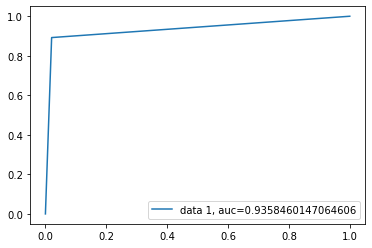

In [85]:
roc_score = roc_auc_score(y_test, y_pred)


fpr, tpr, _ = roc_curve(y_test,  y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(roc_score))
plt.legend(loc=4)
plt.show()

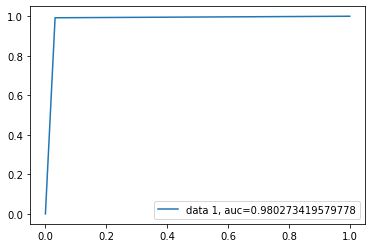

In [86]:
y_pred = model_dt.predict(X_test)
roc_score = roc_auc_score(y_test, y_pred)


fpr, tpr, _ = roc_curve(y_test,  y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(roc_score))
plt.legend(loc=4)
plt.show()

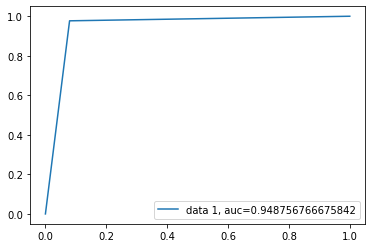

In [87]:
y_pred = model_rf.predict(X_test)
roc_score = roc_auc_score(y_test, y_pred)


fpr, tpr, _ = roc_curve(y_test,  y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(roc_score))
plt.legend(loc=4)
plt.show()

In [88]:
df['profit'] = df['revenue'] - df['budget']

### A Simple Recommendation System

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [90]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['metadata'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [91]:
cosine_sim2

array([[1.        , 0.05872202, 0.05515973, ..., 0.        , 0.03184649,
        0.        ],
       [0.05872202, 1.        , 0.04174829, ..., 0.03465835, 0.        ,
        0.        ],
       [0.05515973, 0.04174829, 1.        , ..., 0.01627793, 0.08490445,
        0.        ],
       ...,
       [0.        , 0.03465835, 0.01627793, ..., 1.        , 0.04229129,
        0.03655819],
       [0.03184649, 0.        , 0.08490445, ..., 0.04229129, 1.        ,
        0.02542464],
       [0.        , 0.        , 0.        , ..., 0.03655819, 0.02542464,
        1.        ]])

In [92]:
# a function that takes the title of the movie and the metric of the similarity and returns the
# top ten similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    indices = pd.Series(df.index, index=df['original_title']).drop_duplicates()
    
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['original_title'].iloc[movie_indices]

In [93]:
get_recommendations("The Dark Knight Rises")

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: original_title, dtype: object

In [94]:
get_recommendations("The Dark Knight Rises", cosine_sim2)

65               The Dark Knight
119                Batman Begins
1359                      Batman
299               Batman Forever
428               Batman Returns
1664               Dead Man Down
210               Batman & Robin
1196                The Prestige
590                    The Siege
4638    Amidst the Devil's Wings
Name: original_title, dtype: object

In [95]:
get_recommendations('The Godfather', cosine_sim2)

2731      The Godfather: Part II
867      The Godfather: Part III
4065                  Mi America
1247             City By The Sea
1765             The Newton Boys
4638    Amidst the Devil's Wings
3293                 10th & Wolf
1873                  Blood Ties
3125                      Eulogy
3831               In Cold Blood
Name: original_title, dtype: object

### Extra Analysis

In [ ]:
# top ten of most profitable directors entire the whole data given by this dataset

In [96]:
top_profitable_directors = df[['director','profit']].groupby('director').sum().reset_index().sort_values('profit',ascending=False).head(10)
top_profitable_directors

,director,profit
2111,Steven Spielberg,7479893164
1738,Peter Jackson,5205642820
886,James Cameron,5136669439
1482,Michael Bay,4422524638
361,Christopher Nolan,3222483234
321,Chris Columbus,3098631503
739,George Lucas,2979336893
1906,Robert Zemeckis,2600622002
1178,Joss Whedon,2424831068
670,Francis Lawrence,2349457182


Text(0.5, 1.0, 'Top ten directors by sum of profits gained')

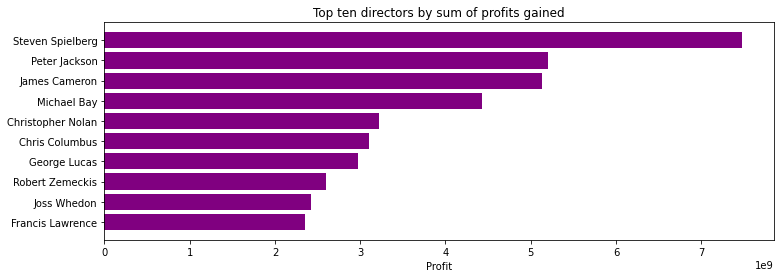

In [97]:
plt.figure(figsize=(12,4))

plt.barh(top_profitable_directors['director'],top_profitable_directors["profit"], align='center',
        color='purple')
plt.gca().invert_yaxis()
plt.xlabel("Profit")
plt.title("Top ten directors by sum of profits gained")

In [98]:
# top ten of most profitable actors entire the whole data given by this dataset

In [99]:
top_profitable_producers = df[['producer','profit']].groupby('producer').sum().reset_index().sort_values('profit',ascending=False)[1:].head(10)
top_profitable_producers

,producer,profit
939,Kevin Feige,7309514384
784,Jerry Bruckheimer,6309878172
718,James Cameron,4914034787
399,David Heyman,4669773498
278,Charles Roven,4481961701
551,Frank Marshall,3426809466
144,Barbara Broccoli,3415380927
319,Christopher Meledandri,3252965140
459,Don Murphy,3245908420
1599,Steven Spielberg,3210514866


Text(0.5, 1.0, 'Top ten directors by sum of profits gained')

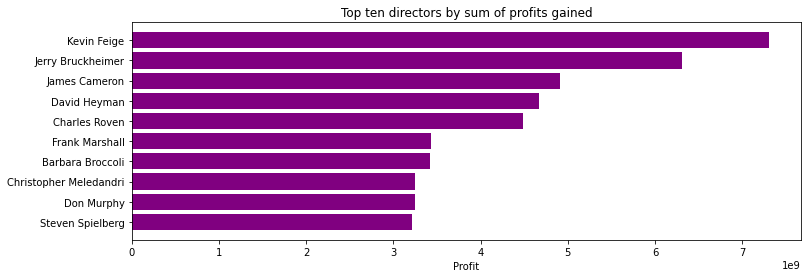

In [100]:
plt.figure(figsize=(12,4))

plt.barh(top_profitable_producers['producer'],top_profitable_producers["profit"], align='center',
        color='purple')
plt.gca().invert_yaxis()
plt.xlabel("Profit")
plt.title("Top ten directors by sum of profits gained")

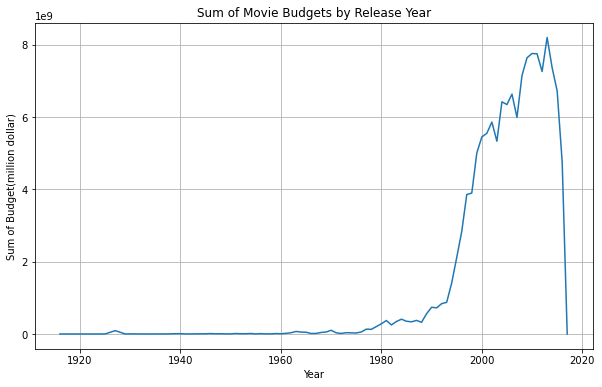

In [101]:
# Extract year from 'release_date'
df['year'] = df['release_date'].dt.year

# Group by year and calculate sum of budget
year_budget_sum = df.groupby('year')['budget'].sum()

# Plot the sum of budget over the years
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(year_budget_sum.index, year_budget_sum.values)
plt.xlabel('Year')
plt.ylabel('Sum of Budget(million dollar)')
plt.title('Sum of Movie Budgets by Release Year')
plt.grid(True)
plt.show()

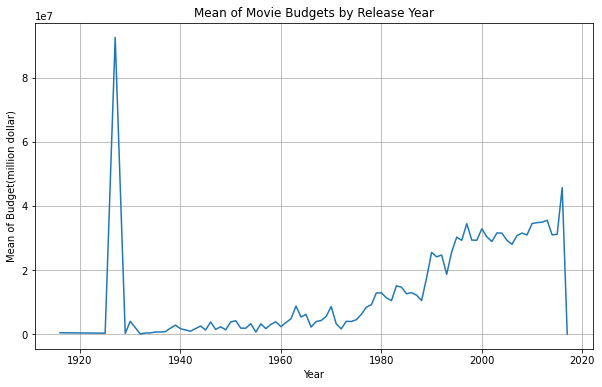

In [102]:
# Extract year from 'release_date'
df['year'] = df['release_date'].dt.year

# Group by year and calculate sum of budget
year_budget_sum = df.groupby('year')['budget'].mean()

# Plot the sum of budget over the years
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(year_budget_sum.index, year_budget_sum.values)
plt.xlabel('Year')
plt.ylabel('Mean of Budget(million dollar)')
plt.title('Mean of Movie Budgets by Release Year')
plt.grid(True)
plt.show()

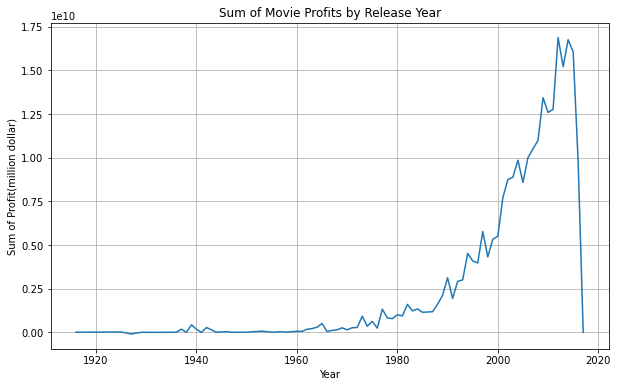

In [103]:
# Extract year from 'release_date'
df['year'] = df['release_date'].dt.year

# Group by year and calculate sum of budget
year_budget_sum = df.groupby('year')['profit'].sum()

# Plot the sum of budget over the years

plt.figure(figsize=(10, 6))
plt.plot(year_budget_sum.index, year_budget_sum.values)
plt.xlabel('Year')
plt.ylabel('Sum of Profit(million dollar)')
plt.title('Sum of Movie Profits by Release Year')
plt.grid(True)
plt.show()

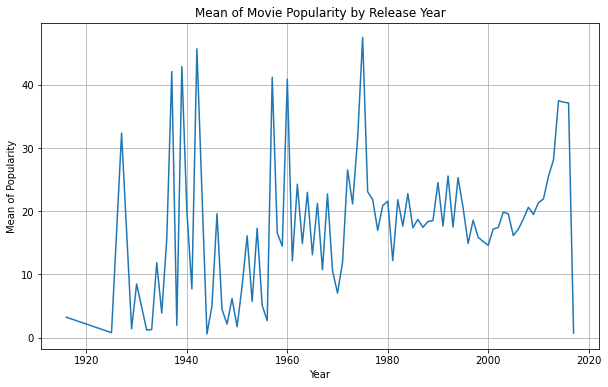

In [104]:
# Extract year from 'release_date'
df['year'] = df['release_date'].dt.year

# Group by year and calculate sum of budget
year_popularity_sum = df.groupby('year')['popularity'].mean()

# Plot the sum of budget over the years

plt.figure(figsize=(10, 6))
plt.plot(year_popularity_sum.index, year_popularity_sum.values)
plt.xlabel('Year')
plt.ylabel('Mean of Popularity')
plt.title('Mean of Movie Popularity by Release Year')
plt.grid(True)
plt.show()

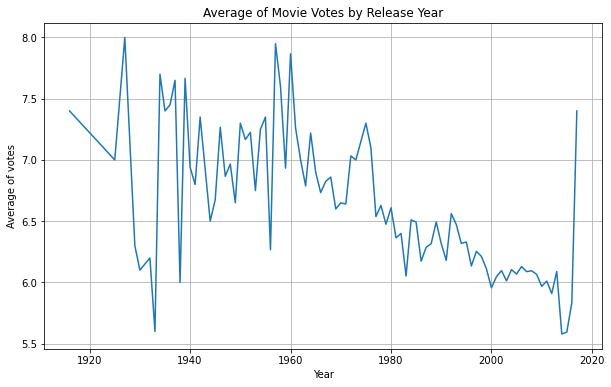

In [105]:
# Extract year from 'release_date'
df['year'] = df['release_date'].dt.year

# Group by year and calculate sum of budget
year_vote_mean = df.groupby('year')['vote_average'].mean()

# Plot the sum of budget over the years
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(year_vote_mean.index, year_vote_mean.values)
plt.xlabel('Year')
plt.ylabel('Average of votes')
plt.title('Average of Movie Votes by Release Year')
plt.grid(True)
plt.show()

There could be indicated that there is a difference between popularity metric and the votes in terms of the trend over the time.

<AxesSubplot:>

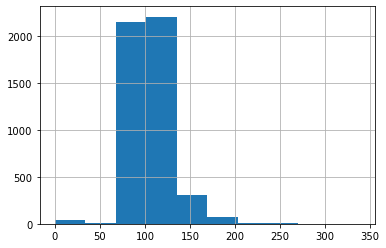

In [106]:
df['runtime'].hist()

year
1916.0    AxesSubplot(0.125,0.125;0.775x0.755)
1925.0    AxesSubplot(0.125,0.125;0.775x0.755)
1927.0    AxesSubplot(0.125,0.125;0.775x0.755)
1929.0    AxesSubplot(0.125,0.125;0.775x0.755)
1930.0    AxesSubplot(0.125,0.125;0.775x0.755)
                          ...                 
2013.0    AxesSubplot(0.125,0.125;0.775x0.755)
2014.0    AxesSubplot(0.125,0.125;0.775x0.755)
2015.0    AxesSubplot(0.125,0.125;0.775x0.755)
2016.0    AxesSubplot(0.125,0.125;0.775x0.755)
2017.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: runtime, Length: 90, dtype: object

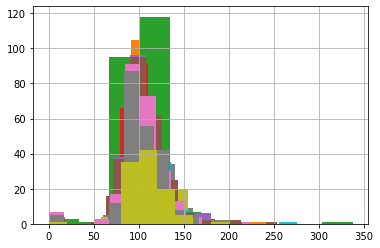

In [107]:
df.groupby('year')['runtime'].hist()

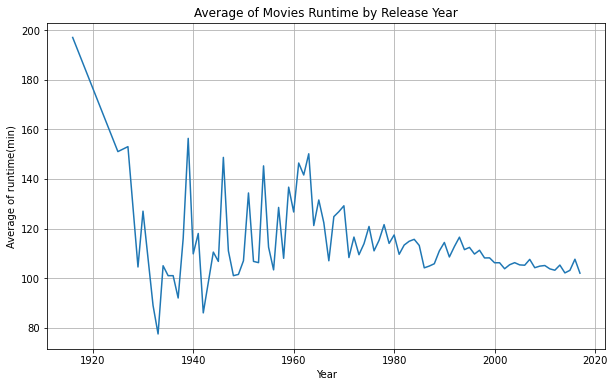

In [108]:
# Extract year from 'release_date'
df['year'] = df['release_date'].dt.year

# Group by year and calculate sum of budget
year_runtime_mean = df.groupby('year')['runtime'].mean()

# Plot the sum of budget over the years
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(year_runtime_mean.index, year_runtime_mean.values)
plt.xlabel('Year')
plt.ylabel('Average of runtime(min)')
plt.title('Average of Movies Runtime by Release Year')
plt.grid(True)
plt.show()

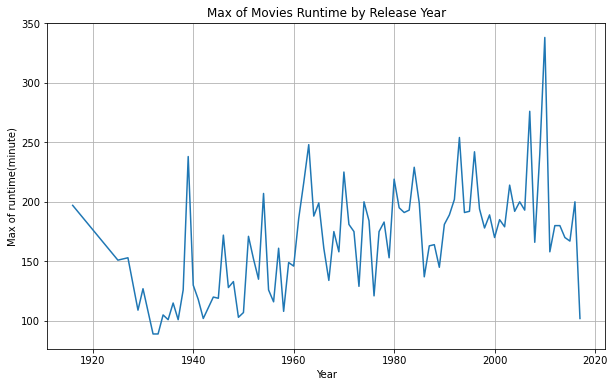

In [109]:
# Extract year from 'release_date'
df['year'] = df['release_date'].dt.year

# Group by year and calculate sum of budget
year_runtime_mean = df.groupby('year')['runtime'].max()

# Plot the sum of budget over the years
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(year_runtime_mean.index, year_runtime_mean.values)
plt.xlabel('Year')
plt.ylabel('Max of runtime(minute)')
plt.title('Max of Movies Runtime by Release Year')
plt.grid(True)
plt.show()

It could be undrestood that there is a fluctuated rise in the maximum runtime of the movies over the time. However, not only there is not a significant increase in the average of movies runtime, but also there is a slight decrease in the range of the fluctuation throughout the recent years.

In [110]:
# Explode the 'cast' column to separate rows for each actor in a movie
df = df.explode("cast")

# Calculate total profit per actor
actor_profits = df.groupby("cast")["profit"].sum()

# Sort actors by total profit (descending)
top_actors = actor_profits.sort_values(ascending=False)

print("Top 10 Most Profitable Actors:")
for i, (actor, profit) in enumerate(top_actors.items(), 1):
    if i > 10:
        break
    print(f"{i}. {actor}: ${profit:,.2f}")

Top 10 Most Profitable Actors:
1. Robert Downey Jr.: $6,234,804,932.00
2. Tom Cruise: $6,184,435,163.00
3. Ian McKellen: $6,182,273,568.00
4. Tom Hanks: $6,072,617,241.00
5. Scarlett Johansson: $5,793,366,575.00
6. Will Smith: $5,256,183,337.00
7. Orlando Bloom: $5,132,578,162.00
8. Cameron Diaz: $5,116,636,082.00
9. Johnny Depp: $4,883,865,082.00
10. Harrison Ford: $4,829,054,691.00


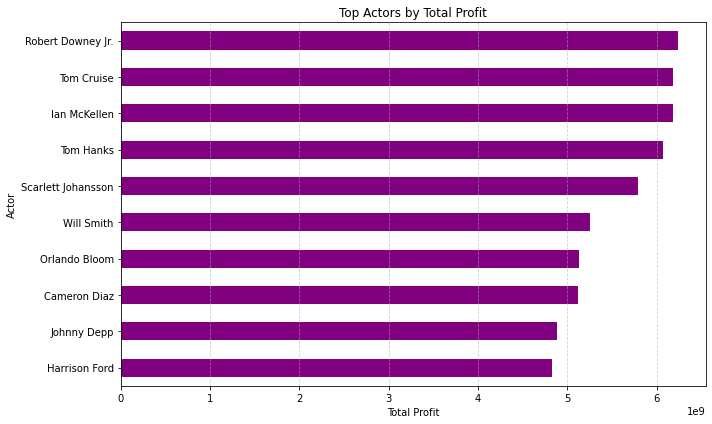

In [111]:
plt.figure(figsize=(10, 6))
top_actors[:10].plot(kind="barh", color='purple')
plt.xlabel('Total Profit')
plt.ylabel('Actor')
plt.title('Top Actors by Total Profit')
plt.gca().invert_yaxis()  # Invert y-axis to display top actor at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [112]:
# Explode the 'cast' column to separate rows for each actor in a movie
df = df.explode("genres")

# Calculate total profit per actor
genre_profits = df.groupby("genres")["profit"].sum()

# Sort actors by total profit (descending)
top_genres = genre_profits.sort_values(ascending=False)

print("Top 5 Most Profitable Genres:")
for i, (genre, profit) in enumerate(top_genres.items(), 1):
    if i > 5:
        break
    print(f"{i}. {genre}: ${profit:,.2f}")

Top 5 Most Profitable Genres:
1. Adventure: $562,161,793,169.00
2. Action: $517,231,728,794.00
3. Comedy: $395,782,451,963.00
4. Drama: $361,148,889,794.00
5. Thriller: $311,113,932,598.00


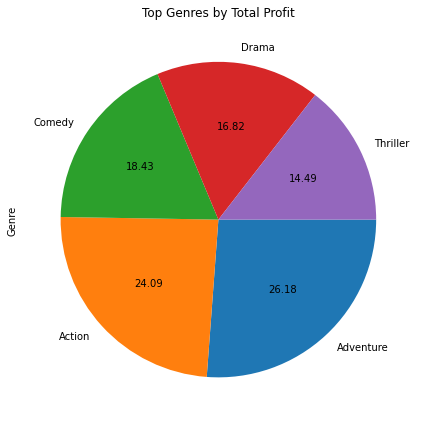

In [113]:
plt.figure(figsize=(10, 6))
top_genres[:5].plot(kind="pie", autopct="%.2f")

plt.ylabel('Genre')
plt.title('Top Genres by Total Profit')
plt.gca().invert_yaxis()  # Invert y-axis to display top actor at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [114]:
# Explode the 'cast' column to separate rows for each actor in a movie
df = df.explode("genres")

# Calculate total profit per actor
genre_counts = df.groupby("genres")['id'].count()


# Sort actors by total profit (descending)
top_genres = genre_counts.sort_values(ascending=False)

print("Top 5 Most Genres in terms of Count:")
for i, (genre, profit) in enumerate(top_genres.items(), 1):
    if i > 5:
        break
    print(f"{i}. {genre}: ${profit:,.2f}")

Top 5 Most Genres in terms of Count:
1. Drama: $11,379.00
2. Comedy: $8,538.00
3. Thriller: $6,260.00
4. Action: $5,735.00
5. Romance: $4,419.00


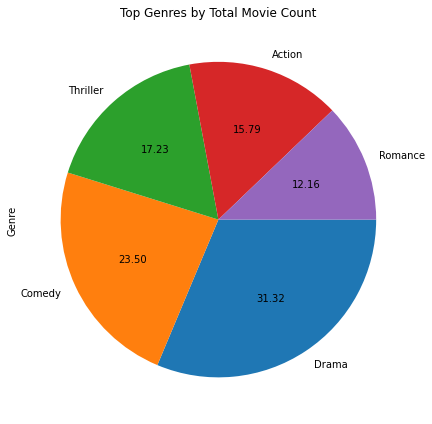

In [115]:
plt.figure(figsize=(10, 6))
top_genres[:5].plot(kind="pie", autopct="%.2f")
plt.ylabel('Genre')
plt.title('Top Genres by Total Movie Count')
plt.gca().invert_yaxis()  # Invert y-axis to display top actor at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [116]:
!pip list --format=freeze > requirements.txt